<a href="https://colab.research.google.com/github/NJ-Sleep/Machine-Learning-practice/blob/main/LearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
transform = transforms.ToTensor()

In [153]:
train_data = datasets.MNIST(root='/CNNdata', train=True, download=True, transform=transform)

In [154]:
test_data = datasets.MNIST(root='/CNNdata', train=False, download=True, transform=transform)

In [155]:
test_data


Dataset MNIST
    Number of datapoints: 10000
    Root location: /CNNdata
    Split: Test
    StandardTransform
Transform: ToTensor()

In [156]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /CNNdata
    Split: Train
    StandardTransform
Transform: ToTensor()

In [157]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [158]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
conv3 = nn.Conv2d(16, 18, 3, 1)
conv4 = nn.Conv2d(18, 22, 3, 1)

In [159]:
for i, (X_train, y_train) in enumerate(train_data):
  break
X_train.shape

torch.Size([1, 28, 28])

In [160]:
X = X_train.view(1,1,28,28)

In [161]:
x = F.relu(conv1(X))
x.shape

torch.Size([1, 6, 26, 26])

In [162]:
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 24, 24])

In [163]:
x = F.relu(conv3(x))
x.shape

torch.Size([1, 18, 22, 22])

In [164]:
x = F.relu(conv4(x))
x.shape

torch.Size([1, 22, 20, 20])

In [165]:
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 22, 10, 10])

In [166]:
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 22, 5, 5])

In [185]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3 ,1)
    self.conv2 = nn.Conv2d(6, 16, 3 ,1)
    self.conv3 = nn.Conv2d(16, 18, 3 ,1)
    self.conv4 = nn.Conv2d(18, 22, 3 ,1)
    self.__to__linear = x[0].shape[0] * x[0].shape[1] *x[0].shape[2]
    self.fc1 = nn.Linear(self.__to__linear, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.relu(self.conv2(X))
    X = F.relu(self.conv3(X))
    X = F.relu(self.conv4(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.max_pool2d(X, 2, 2)

    X = X.view(-1, self.__to__linear)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [186]:
torch.manual_seed(78)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(18, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [187]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [188]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b % 600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total_time = current_time - start_time
print(f'Training Took: {total_time/60} minutes')

Epoch: 0 Batch: 600 Loss: 0.04955168813467026
Epoch: 0 Batch: 1200 Loss: 0.578542172908783
Epoch: 0 Batch: 1800 Loss: 0.09714271873235703
Epoch: 0 Batch: 2400 Loss: 0.015008213929831982
Epoch: 0 Batch: 3000 Loss: 0.030887821689248085
Epoch: 0 Batch: 3600 Loss: 0.00010501273209229112
Epoch: 0 Batch: 4200 Loss: 0.05825711041688919
Epoch: 0 Batch: 4800 Loss: 0.008428107015788555
Epoch: 0 Batch: 5400 Loss: 0.012355350889265537
Epoch: 0 Batch: 6000 Loss: 0.0024508857168257236
Epoch: 1 Batch: 600 Loss: 0.07442472875118256
Epoch: 1 Batch: 1200 Loss: 0.060006190091371536
Epoch: 1 Batch: 1800 Loss: 0.003536602947860956
Epoch: 1 Batch: 2400 Loss: 0.002663264749571681
Epoch: 1 Batch: 3000 Loss: 0.3672183156013489
Epoch: 1 Batch: 3600 Loss: 0.04206511750817299
Epoch: 1 Batch: 4200 Loss: 0.0007867339299991727
Epoch: 1 Batch: 4800 Loss: 0.0029449600260704756
Epoch: 1 Batch: 5400 Loss: 0.054883360862731934
Epoch: 1 Batch: 6000 Loss: 8.211880776798353e-05
Epoch: 2 Batch: 600 Loss: 0.000304331682855263

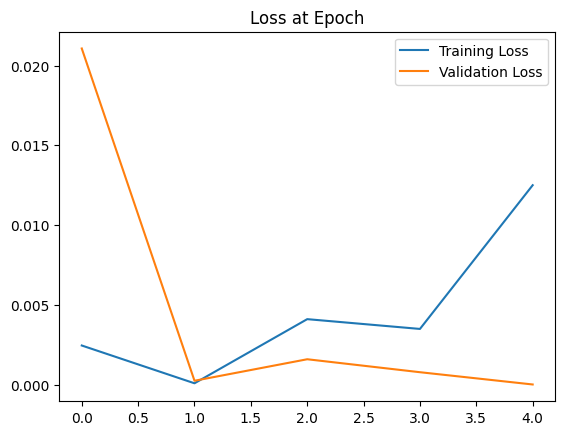

In [189]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

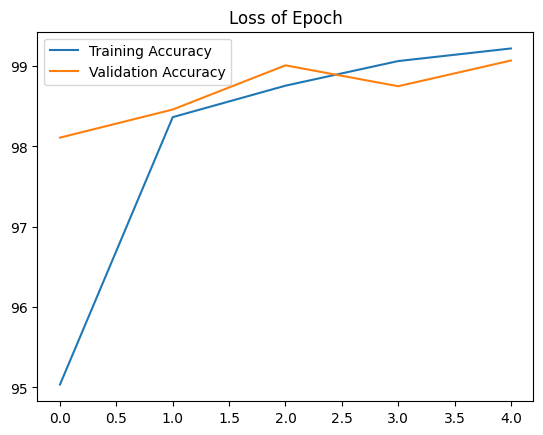

In [190]:
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label = 'Validation Accuracy')
plt.title('Loss of Epoch')
plt.legend()

In [191]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [192]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()



In [193]:
correct.item()/len(test_data)*100

99.07000000000001

In [194]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [195]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

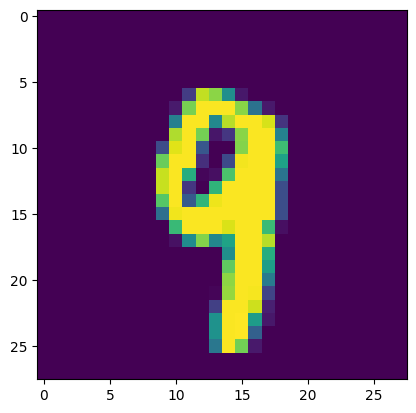

In [196]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [197]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [198]:
new_prediction

tensor([[-2.2651e+01, -2.4474e+01, -2.3525e+01, -1.9453e+01, -1.5678e+01,
         -1.8331e+01, -3.1026e+01, -1.6215e+01, -1.5608e+01, -4.7684e-07]])

In [199]:
new_prediction.argmax()

tensor(9)